In [1]:
import numpy as np
import pandas as pd
import os
from Resampled_learn import Resampled_Cross_Validate, Resampled_RFECV, BalancedBagging_Valudation
from sklearn import linear_model, svm, tree, neighbors, neural_network, ensemble
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve, KFold, cross_val_predict
from sklearn.grid_search import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from tensorflow.contrib import learn
import xgboost as xgb
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.feature_selection import RFECV

In [2]:
os.chdir("C:/Users/zhaow/Dropbox/Datascience/titanic")

In [3]:
df_train = pd.read_csv('titanic_train.csv')
df_test = pd.read_csv('titanic_test.csv')

In [4]:
df_train = df_train.drop('Mr.', axis = 1).drop('Embarked_S', axis = 1)
df_test = df_test.drop('Mr.', axis = 1).drop('Embarked_S', axis = 1)

In [5]:
def Pclass_dummy(data):
    dummies = pd.get_dummies(data['Pclass'])
    dummies.columns = ['C1', 'C2', 'C3']
    dummies = dummies.drop('C3', axis =1)
    data_out = pd.concat([data, dummies], axis = 1)
    data_out = data_out.drop('Pclass', axis=1)
    return data_out

df_train = Pclass_dummy(df_train)
df_test = Pclass_dummy(df_test)

In [7]:
df_train.shape

(893, 15)

In [8]:
df_train = df_train.drop_duplicates()
df_test = df_test.drop_duplicates()

In [9]:
def func(x):
    if x > 0:
        return 1
    else:
        return 0

In [10]:
df_train['Is Family Survive'] = df_train['Family survive rate'].apply(func)
df_test['Is Family Survive'] = df_test['Family survive rate'].apply(func)

In [11]:
pd.pivot_table(df_train, index='Is Family Survive', columns='Survived', values='PassengerId', aggfunc='count')

Survived,0,1
Is Family Survive,,
0,470,228
1,79,114


In [12]:
df_train = df_train.drop('Family survive rate', axis=1)
df_test = df_test.drop('Family survive rate', axis=1)

In [13]:
"""訓練用、テスト用データの生成"""
X_train = df_train.drop('PassengerId', axis = 1)
X_train = X_train.drop('Survived', axis = 1)
Y_train = df_train['Survived']
X_test = df_test.drop('PassengerId', axis = 1)
PassangerId = df_test['PassengerId']

In [14]:
print(Y_train.sum())
print(len(Y_train) - Y_train.sum())

342
549


In [15]:
rfe = Resampled_Cross_Validate(n_splits=5, verbose=True, sampler='OverSampler')

In [16]:
rfe.fit(X_train, Y_train)

Start Processing Resampled Validation: 5 splits
Done: 1, Totaling: 5
Done: 2, Totaling: 5
Done: 3, Totaling: 5
Done: 4, Totaling: 5
Done: 5, Totaling: 5


In [17]:
print(rfe.acc_.mean())
print(rfe.pre_.mean())
print(rfe.rec_.mean())
print(rfe.f1_.mean())
print(rfe.roc_auc_.mean())

0.829445734731
0.776651905309
0.782606644951
0.777992423172
0.82180427772


In [18]:
rfecv = Resampled_RFECV(n_steps=1, cv=5, sampler='OverSampler')

In [19]:
rfecv.fit(X_train, Y_train)

100%|██████████| 13/13 [00:02<00:00,  5.66it/s]


In [20]:
rfecv.mean_score_['ACC']

array([ 0.6723244 ,  0.6846714 ,  0.69927814,  0.810376  ,  0.81708618,
        0.82269161,  0.81373423,  0.82045069,  0.83281024,  0.82494508,
        0.82832214,  0.83505116,  0.82157429])

<Figure size 432x288 with 0 Axes>

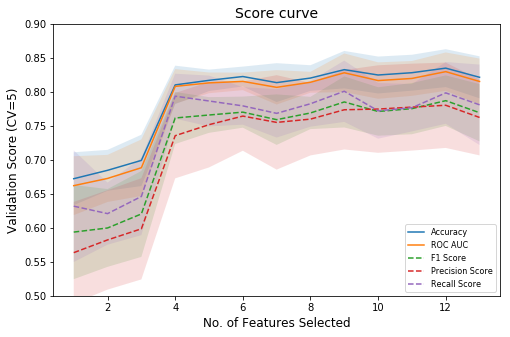

In [22]:
rfecv.draw_figure(X_train, Y_train, ymin=0.5, ymax=0.9, fill_btw=True)

<Figure size 432x288 with 0 Axes>

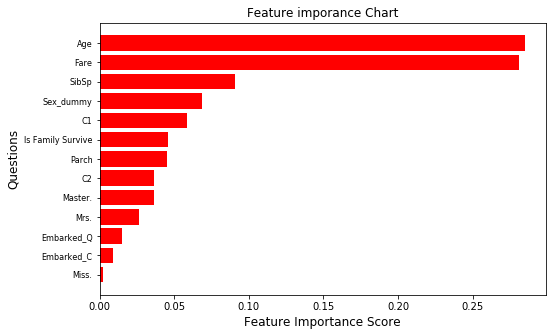

In [23]:
rfecv.draw_barchart(X_train, Y_train)

In [24]:
bbv = BalancedBagging_Valudation(n_jobs=-1, n_estimators=10, cv=5)
bbv.fit(X_train, Y_train)

Checking Cross Validation Score with Balanced Bagging: 5 splits
Done: 1, Totaling: 5
Done: 2, Totaling: 5
Done: 3, Totaling: 5
Done: 4, Totaling: 5
Done: 5, Totaling: 5


In [26]:
bbv.acc_

array([ 0.77653631,  0.83146067,  0.8258427 ,  0.80898876,  0.87078652])

In [27]:
bbv.predict(X_test)

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0,

In [28]:
clf = xgb.XGBClassifier(n_jobs=-1)

In [29]:
rfe = RFECV(clf, scoring='accuracy', step=1, n_jobs=-1, verbose=1, cv=5)
rfe.fit(X_train, Y_train)

RFECV(cv=5,
   estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=-1, nthread=None, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1),
   n_jobs=-1, scoring='accuracy', step=1, verbose=1)

<Figure size 800x550 with 0 Axes>

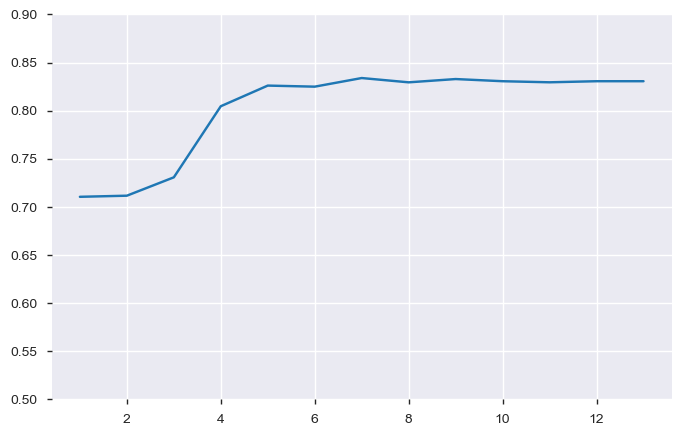

In [30]:
plt.clf()
fig = plt.figure(figsize=(8,5), facecolor='w')
plt.plot(range(1, len(rfe.grid_scores_)+1), rfe.grid_scores_, '-')
plt.ylim(0.5, 0.9)
plt.show()

In [31]:
Y_predict = bbv.predict(X_test)
result_BB = pd.DataFrame([PassangerId, Y_predict], index = ['PassengerId', 'Survived']).T
result_BB.to_csv('result_BB.csv', index = False)

In [ ]:
"""データの標準化"""
scaler = MinMaxScaler((0, 1))
scaler.fit(X_train)
x_train= scaler.transform(X_train)
x_test = scaler.transform(X_test)

In [ ]:
"""チューニングパラメータの設定"""
tuned_parameters_log = [
    {'penalty': ['l1'], 'C': np.logspace(-2, 2, 10)},
    {'penalty': ['l2'], 'C': np.logspace(-2, 2, 10)}
]

tuned_parameters_svm = [
    {'C': np.logspace(-2, 2, 10), 'kernel': ['linear']},
    {'C': np.logspace(-2, 2, 10), 'kernel': ['rbf'], 'gamma': [0.001, 0.0001]},
    {'C': np.logspace(-2, 2, 10), 'kernel': ['poly'], 'gamma': [0.001, 0.0001]},
    {'C': [1, 10, 100], 'kernel': ['sigmoid'], 'gamma': [0.001, 0.0001]}
]

tuned_parameters_rdfr = {"max_depth": [2,3, None],
                         "n_estimators":[100, 200, 300],
                         "max_features": [1, 3, 5],
                         "min_samples_split": [2, 3, 10],
                         "min_samples_leaf": [1, 3, 10],
                         "bootstrap": [True, False],
                         "criterion": ["gini", "entropy"]}

tuned_parameters_gb = {'n_estimators': [100, 500, 1000, 2000, 3000],
                       'learning_rate' : [0.1, 0.05, 0.02, 0.01], 
                       'max_depth': [4, 6],
                       'min_samples_leaf': [3, 5, 9, 17],
                       'max_features': [1.0, 0.3, 0.1]
                      }

tuned_parameters_ner = [
                        {'hidden_layer_sizes': [(100), (100, 100), (100, 100, 10), (100, 100, 100, 10), (100, 50), (100, 50, 10), (10, 50, 50, 10)],
                         'activation':  ["relu", "tanh", "logistic", "identity"],
                         'alpha' : np.logspace(-5, -2, 5),
                         'solver': ["sgd"],
                         'learning_rate_init': [1.0, 0.01, 0.001, 0.0001],
                         'learning_rate': ['constant', 'invscaling', 'adaptive']},
                        {'hidden_layer_sizes': [(100), (100, 100), (100, 100, 10), (100, 100, 100, 10), (100, 50), (100, 50, 10), (10, 50, 50, 10)],
                         'activation':  ["relu", "tanh", "logistic", ],
                         'alpha' : np.logspace(-5, -2, 5),
                         'solver': ["adam"],
                         'learning_rate_init': [1.0, 0.01, 0.001, 0.0001]},
                        {'hidden_layer_sizes': [(100), (100, 100), (100, 100, 10), (100, 100, 100, 10), (100, 50), (100, 50, 10), (10, 50, 50, 10)],
                         'activation':  ["relu", "tanh", "logistic", "identity"],
                         'alpha' : np.logspace(-5, -2, 5),
                         'solver': ["lbfgs"]}
                        ]

tuned_parameters_xgb = {'max_depth': [2,4,6,10,20],
                        'min_child_weight': [1, 2, 3, 4, 5],
                        'gamma': np.logspace(-2, 2, 10)
                       }

In [ ]:
"""パラメータチューニングのためのグリットをセット"""
grid_log = GridSearchCV(linear_model.LogisticRegression(),
                        param_grid=tuned_parameters_log,
                        scoring='accuracy',
                        n_jobs=-1, verbose=3, cv=10)

grid_ner = GridSearchCV(neural_network.MLPClassifier(max_iter=300),
                       param_grid=tuned_parameters_ner,
                       scoring='accuracy',
                       n_jobs=-1, verbose=3, cv=5)

grid_svm = GridSearchCV(svm.SVC(), tuned_parameters_svm, scoring = 'accuracy', n_jobs = -1, verbose = 3, cv=5)

grid_rdfr = GridSearchCV(ensemble.RandomForestClassifier(random_state=0),
                        param_grid=tuned_parameters_rdfr,
                        scoring='accuracy',
                        n_jobs=-1, verbose=3, cv=5)

gird_gb = GridSearchCV(ensemble.GradientBoostingClassifier(),
                      param_grid = tuned_parameters_gb,
                      scoring='accuracy',
                      n_jobs=-1, verbose=3, cv=5)

grid_xgb = GridSearchCV(xgb.XGBClassifier(),
                      param_grid = tuned_parameters_xgb,
                      scoring='accuracy',
                      n_jobs=-1, verbose=3, cv=10)

In [ ]:
"""グリッドサーチの開始（フィッティング）"""
#grid_ner.fit(x_train, Y_train)
#grid_svm.fit(x_train, Y_train)
#grid_rdfr.fit(x_train, Y_train)
#grid_gb.fit(x_train, Y_train)
grid_log.fit(x_train, Y_train)
grid_xgb.fit(x_train, Y_train)

In [ ]:
"モデルの初期化"
clf_log = grid_log.best_estimator_
clf_svm = svm.SVC()
clf_tree = tree.DecisionTreeClassifier()
clf_knn = neighbors.KNeighborsClassifier(n_neighbors = 3)
clf_ner = neural_network.MLPClassifier(max_iter = 500)
clf_rdfr = ensemble.RandomForestClassifier()
clf_gb = ensemble.GradientBoostingClassifier()
clf_xgb = grid_xgb.best_estimator_

In [ ]:
model_list = [clf_log, clf_svm, clf_ner, clf_knn, clf_tree, clf_rdfr, clf_gb, clf_xgb]

for model in model_list:
    model.fit(x_train, Y_train)

In [ ]:
for model in model_list:
    print("Processing %s" % model.__class__.__name__)
    scores = cross_val_score(model, x_train, Y_train, cv=10, scoring = 'accuracy', n_jobs = -1)
    print("Cross validation scores:{}".format(scores.mean().round(3)))
    print()

"""グリッドサーチの結果の表示"""
print('SVM best estimator: %s' % clf_svm.best_estimator_)
print('SVM best parameter: %s' % clf_svm.best_params_)
print('SVM best score: %f' % clf_svm.best_score_)

print('NN best estimator: %s' % clf_ner.best_estimator_)
print('NN best parameter: %s' % clf_ner.best_params_)
print('NN best score: %f' % clf_ner.best_score_)

print('RandomForest best estimator: %s' % clf_rdfr.best_estimator_)
print('RandomForest best parameter: %s' % clf_rdfr.best_params_)
print('RandomForest best score: %f' % clf_rdfr.best_score_)

print('GradientBoosting best estimator: %s' % clf_gb.best_estimator_)
print('GradientBoosting parameter: %s' % clf_gb.best_params_)
print('GradientBoosting score: %f' % clf_gb.best_score_)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
"""cofusion Matrixの描画"""
confusion_matrix(Y_train, clf_xgb.predict(x_train))

In [ ]:
"""Imporance Scoreの抽出、棒グラフの描画"""
Importances = pd.concat([pd.Series(X_train.columns).reset_index(drop = True), pd.Series(clf_xgb.feature_importances_).reset_index(drop = True)], axis = 1)
Importances.columns = ['Variables', 'Importance']
Importances = Importances.sort_values(by='Importance', ascending=True)

In [ ]:
plt.clf()
fig = plt.figure(figsize=(10,6), facecolor='w')
plt.barh(range(len(Importances)), Importances.Importance, color = 'red')
plt.yticks(range(len(Importances)), Importances.Variables)
plt.xlabel('Importance', fontsize = 12)
plt.ylabel('Variables', fontsize = 12)
plt.legend(loc='best', fontsize = 12)
plt.tick_params(labelsize=12)
plt.show()

In [ ]:
from sklearn.feature_selection import RFECV, RFE

In [ ]:
"""RFECVによる変数逐次削減"""
selector = RFECV(clf_xgb, cv=10, step=1, scoring='accuracy', verbose=3, n_jobs=-1)

In [ ]:
selector.fit(x_train, Y_train)

In [ ]:
"""逐次削減結果の確認"""
plt.clf()
fig = plt.figure(figsize=(10,6), facecolor='w')
plt.xlabel('No. of variables selected')
plt.ylabel('Accuracy Score')
plt.plot(range(1, len(selector.grid_scores_)+1), selector.grid_scores_, 'o-')
plt.show()

In [ ]:
"""最大精度を出す変数群を取得(transformメソッドでも行ける)"""
var = pd.Series(X_train.columns).reset_index(drop=True)
sel = pd.Series(selector.get_support()).reset_index(drop=True)
varlist = pd.concat([var, sel], axis = 1)
varlist.columns = ['var', 'bool']

In [ ]:
selector.get_support()

In [ ]:
X_selected_train = X_train.loc[:, varlist[varlist['bool'] == True]['var']]

In [ ]:
scaler_select = MinMaxScaler((0,1))
x_selected_train = scaler_select.fit(X_selected_train)
x_selected_train = scaler_select.transform(X_selected_train)

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(estimator=clf_xgb, X=x_selected_train, y=Y_train,
                                                        train_sizes=np.linspace(0.1, 1.0, 10),
                                                        cv=10, n_jobs=-1, verbose=3)

In [ ]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

In [ ]:
plt.clf()
fig = plt.figure(figsize=(10,6), facecolor='w')
plt.plot(train_sizes, train_mean, color = 'blue', marker='o', markersize=5, label='training accuracy')
plt.fill_between(train_sizes, train_mean+train_std, train_mean-train_std, alpha=0.15, color='b')

plt.plot(train_sizes, test_mean, color = 'green', marker='s', linestyle='--', markersize=5, label='validation accuracy')
plt.fill_between(train_sizes, test_mean+test_std, test_mean-test_std, alpha=0.15, color='green')

plt.grid()
plt.xlabel('No. of Traning Samples')
plt.ylabel('Accuracy')
plt.legend(loc ='best')

plt.show()

In [ ]:
X_selected_test = X_test.loc[:, varlist[varlist['bool'] == True]['var']]

In [ ]:
scaler_select = MinMaxScaler((0,1))
x_selected_test = scaler_select.fit(X_selected_test)
x_selected_test = scaler_select.transform(X_selected_test)

In [ ]:
tuned_parameters_log = [
    {'penalty': ['l1'], 'C': np.logspace(-2, 2, 10)},
    {'penalty': ['l1'], 'C': np.logspace(-2, 2, 10)}
]

In [ ]:
grid_log = GridSearchCV(linear_model.LogisticRegression(),
                        param_grid=tuned_parameters_log,
                        scoring='accuracy',
                        n_jobs=-1, verbose=3, cv=10)

In [ ]:
grid_log.fit(x_selected_train, Y_train)

Xgbだとパラメータチューニング、変数選択をしてもバリアンスが大きい<br>
つまり、トレーニングデータが少なすぎる<br>

一方、Logistic回帰は、バリアンスが小さい<br>
やっぱりロジスティクス回帰が一番いいモデルなのかも<br>

In [ ]:
Y_predict = grid_log.best_estimator_.predict(x_selected_test)

In [ ]:
result_log = pd.DataFrame([PassangerId, Y_predict], index = ['PassengerId', 'Survived']).T
result_log.to_csv('result_log.csv', index = False)